# Assignment 8
### Scott Bennett
### 29 Apr 2023

### The libraries you will use are already loaded for you below

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

- First I am going to imports and reads titles.csv into a pandas dataframe

- Then I will use .head() to displays the first five rows of the data frame

In [2]:
# your code here
titles_df = pd.read_csv('titles.csv')

titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


- That loaded the 'titles.csv', and now I will do the same with 'credits.csv'

In [3]:
credits_df = pd.read_csv('credits.csv')

credits_df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In order to determine unique genres, I first had to clean the special characters around the values. I ddi that and created a new data frame with the clean genres to work from.

In [4]:
#Remove all special characters from genres
titles_df['genres'] = titles_df['genres'].str.replace(",",'').str.replace("[",'').str.replace("]",'').str.replace("'",'')      

titles_clean_genre = titles_df

titles_clean_genre.head()   

/var/folders/x6/mfh33q7s3cvc898c6t2db6jc0000gp/T/ipykernel_48003/1591239276.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titles_df['genres'] = titles_df['genres'].str.replace(",",'').str.replace("[",'').str.replace("]",'').str.replace("'",'')


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,crime drama,['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy fantasy,['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


Then I created a list with all the genres as individual elements and split the elements that had multiple genres combined. Finally, I appended all unique items in that list to a new list called unique_genres.

In [5]:
all_genres = list(chain(titles_clean_genre['genres']))
all_genres = [genre.split(' ')[0] for genre in all_genres]

unique_genres = []

for genre in all_genres: 
    if genre not in unique_genres:
        unique_genres.append(genre)

print(unique_genres)

['documentation', 'crime', 'comedy', 'horror', 'thriller', 'drama', 'romance', 'western', 'war', 'fantasy', 'scifi', 'action', 'family', 'animation', 'reality', '', 'music', 'history', 'sport']


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

I first created a new data frame with just title, release_year, and imdb_score to work with.

In [6]:
# your code here
titles_imdb_year = titles_clean_genre[['title', 'release_year','imdb_score']]

titles_imdb_year.head()

,title,release_year,imdb_score
0,Five Came Back: The Reference Films,1945,NaN
1,Taxi Driver,1976,8.3
2,Monty Python and the Holy Grail,1975,8.2
3,Life of Brian,1979,8.0
4,The Exorcist,1973,8.1


There is an NaN value in the first row under imdb_score, so I made sure to drop all values that had NA values throughout my selection of columns.

In [7]:
titles_imdb_year = titles_imdb_year.dropna()

titles_imdb_year.head()

,title,release_year,imdb_score
1,Taxi Driver,1976,8.3
2,Monty Python and the Holy Grail,1975,8.2
3,Life of Brian,1979,8.0
4,The Exorcist,1973,8.1
5,Monty Python's Flying Circus,1969,8.8


Then I grouped the items by release year and found the mean imdb_score.

In [8]:
avg_imdb_by_year = titles_imdb_year.groupby(['release_year'])['imdb_score'].mean()

avg_imdb_by_year = avg_imdb_by_year.to_frame()

avg_imdb_by_year.head()


,imdb_score
release_year,
1953,6.80
1954,7.45
1956,6.70
1958,7.50
1959,6.70


After that, I had to find the highest average score and what year that average was in.

In [9]:
highest_avg_imdb_score = avg_imdb_by_year.iloc[avg_imdb_by_year.imdb_score.argmax()]

highest_avg_imdb_score

imdb_score    8.0
Name: 1985, dtype: float64

The highest average IMDB score was in 1985 with a score of 8.0.

## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

I wanted to see how many rows would be dropped by using dropna() right away, and it was more than if I limited the data frame to just the variables I was interested in. So I created a dataframe with only movie_id and role selected. 

In [10]:
# your code here
print(credits_df.dropna().shape)

id_role_credits_df = credits_df[['id','name','role']] 
print(id_role_credits_df.head()) 

print(id_role_credits_df.shape) 

(67586, 5)
        id             name   role
0  tm84618   Robert De Niro  ACTOR
1  tm84618     Jodie Foster  ACTOR
2  tm84618    Albert Brooks  ACTOR
3  tm84618    Harvey Keitel  ACTOR
4  tm84618  Cybill Shepherd  ACTOR
(77213, 3)


Then just to confirm that there were no NA values in my new dataframe, I ran dropna() again.

In [11]:
clean_id_role_credits = id_role_credits_df.dropna()


print(clean_id_role_credits.shape)

(77213, 3)


We need to remove directors since we only care about Actor roles.

In [12]:
id_actor_credits = clean_id_role_credits.loc[clean_id_role_credits['role'].str.upper() == 'ACTOR']

print(id_actor_credits.head())

print(id_actor_credits.shape)

        id             name   role
0  tm84618   Robert De Niro  ACTOR
1  tm84618     Jodie Foster  ACTOR
2  tm84618    Albert Brooks  ACTOR
3  tm84618    Harvey Keitel  ACTOR
4  tm84618  Cybill Shepherd  ACTOR
(72690, 3)


We went from 77213 rows to 72690 rows so we cut a few thousand director credits and limited our dataframe to only actors.

I then created a new dataframe with total actors by id. This also automatically sorts by descending value

In [13]:
total_actors_by_id = id_actor_credits.id.value_counts().reset_index(name='Total Actors') 

total_actors_by_id.head()

,index,Total Actors
0,tm32982,207
1,tm244149,173
2,tm84613,149
3,tm467467,137
4,tm158304,136


We have our movie with the most actors and it is tm32982. We will use this to search our title data frame for the right movie title.

In [14]:
most_actor_movie = titles_df.loc[titles_df['id'] == 'tm32982']

print(most_actor_movie)

          id           title   type  \
718  tm32982  Les Misérables  MOVIE   

                                           description  release_year  \
718  An adaptation of the successful stage musical ...          2012   

    age_certification  runtime                     genres  \
718             PG-13      157  drama romance history war   

    production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
718         ['GB', 'US']      NaN  tt1707386         7.5    325132.0   

     tmdb_popularity  tmdb_score  
718             18.0         7.3  


The movie with the most credited actors is Les Miserables(2012)

## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

In [15]:
# your code here
robert_deniro_movies = clean_id_role_credits.loc[clean_id_role_credits['name'] == 'Robert De Niro']

print(robert_deniro_movies.shape)

print(robert_deniro_movies)

(10, 3)
             id            name   role
0       tm84618  Robert De Niro  ACTOR
798    tm180542  Robert De Niro  ACTOR
1048   tm145608  Robert De Niro  ACTOR
6356    tm84906  Robert De Niro  ACTOR
14755   tm59428  Robert De Niro  ACTOR
15676  tm165995  Robert De Niro  ACTOR
19309  tm181533  Robert De Niro  ACTOR
44208  tm311902  Robert De Niro  ACTOR
46481  tm244149  Robert De Niro  ACTOR
61454  tm844497  Robert De Niro  ACTOR


I found ten Robert De Niro movies from the credits dataframe and merged titles and robert de niro movies data frames by id


In [18]:
robert_deniro_titles_merged = pd.merge(robert_deniro_movies, titles_df, on="id") 

robert_deniro_titles_merged

,id,name,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Robert De Niro,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,crime drama,['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
1,tm180542,Robert De Niro,ACTOR,Once Upon a Time in America,MOVIE,A former Prohibition-era Jewish gangster retur...,1984,R,229,drama crime european,"['US', 'IT']",NaN,tt0087843,8.3,342335.0,21.322,8.4
2,tm145608,Robert De Niro,ACTOR,Awakenings,MOVIE,"Dr. Malcolm Sayer, a shy research physician, u...",1990,PG-13,120,drama european,['US'],NaN,tt0099077,7.8,137549.0,13.761,7.8
3,tm84906,Robert De Niro,ACTOR,Stardust,MOVIE,In a countryside town bordering on a magical l...,2007,PG-13,122,fantasy romance family,"['US', 'IS', 'GB']",NaN,tt0486655,7.6,269043.0,17.538,7.2
4,tm59428,Robert De Niro,ACTOR,Silver Linings Playbook,MOVIE,After spending eight months in a mental instit...,2012,R,122,drama romance comedy,['US'],NaN,tt1045658,7.7,697481.0,26.254,7.1
5,tm165995,Robert De Niro,ACTOR,New Year's Eve,MOVIE,The lives of several couples and singles in Ne...,2011,PG-13,113,comedy romance documentation,['US'],NaN,tt1598822,5.6,85658.0,24.531,5.9
6,tm181533,Robert De Niro,ACTOR,The Big Wedding,MOVIE,To the amusement of their adult children and f...,2013,R,90,comedy drama romance,['US'],NaN,tt1931435,5.6,49549.0,8.928,5.9
7,tm311902,Robert De Niro,ACTOR,Jim Norton: Mouthful of Shame,MOVIE,"Fedoras, mom's underpants, and puppy love all ...",2017,NaN,61,comedy,['US'],NaN,tt6664120,7.0,1324.0,4.476,6.9
8,tm244149,Robert De Niro,ACTOR,The Irishman,MOVIE,"Pennsylvania, 1956. Frank Sheeran, a war veter...",2019,R,209,drama crime history thriller,['US'],NaN,tt1302006,7.8,371209.0,19.740,7.6
9,tm844497,Robert De Niro,ACTOR,The Irishman: In Conversation,MOVIE,"Martin Scorsese, Robert De Niro, Joe Pesci, an...",2019,NaN,23,documentation,['US'],NaN,NaN,NaN,NaN,6.995,7.6


Then I needed to pull the rows with the highest imdb score

In [19]:
best_deniro_movies = robert_deniro_titles_merged.iloc[robert_deniro_titles_merged.imdb_score.argmax()] 

best_deniro_movies

id                                                                tm84618
name                                                       Robert De Niro
role                                                                ACTOR
title                                                         Taxi Driver
type                                                                MOVIE
description             A mentally unstable Vietnam War veteran works ...
release_year                                                         1976
age_certification                                                       R
runtime                                                               113
genres                                                        crime drama
production_countries                                               ['US']
seasons                                                               NaN
imdb_id                                                         tt0075314
imdb_score                            

The highest rated De Niro movie is Taxi Driver.

Then I created a seaborn kdeplot showing the density of imdb scores of movies with Robert De Niro

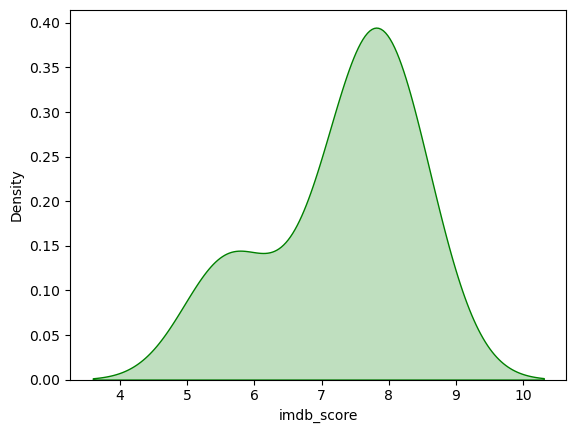

In [20]:
kde = sns.kdeplot(robert_deniro_titles_merged['imdb_score'], color = 'green', shade = True)
plt.show()

## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


First I created a new dataframe with titles_df that we will use to add the new columns, then I added a war_movies and a gangster_movies column

In [21]:
# your code here
titles_boolean_df = titles_df

titles_boolean_df['war_movies'] = titles_boolean_df['description'].str.contains("war", case = False) 

titles_boolean_df['gangster_movies'] = titles_boolean_df['description'].str.contains("gangster", case = False) 

titles_boolean_df.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,war_movies,gangster_movies
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,['US'],1.0,NaN,NaN,NaN,0.600,NaN,True,False
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,crime drama,['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,True,False
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy fantasy,['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,False,False
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,False,False
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,False,False


Then I created a new data frame which selected rows where war movies or gangster movies equaled True

In [22]:
total_war_gangster_movies = titles_boolean_df.loc[(titles_boolean_df['war_movies'] == True) | (titles_boolean_df['gangster_movies'] == True)]

print(total_war_gangster_movies.head())

print(total_war_gangster_movies.shape)

          id                                title   type  \
0   ts300399  Five Came Back: The Reference Films   SHOW   
1    tm84618                          Taxi Driver  MOVIE   
15   tm16479                      White Christmas  MOVIE   
19  tm156453                                  FTA  MOVIE   
23   tm14350                     Alexandria… Why?  MOVIE   

                                          description  release_year  \
0   This collection includes 12 World War II-era p...          1945   
1   A mentally unstable Vietnam War veteran works ...          1976   
15  Two talented song-and-dance men team up after ...          1954   
19  A documentary about a political troupe headed ...          1972   
23  Set against the panoramic backdrop of war-torn...          1979   

   age_certification  runtime                      genres  \
0              TV-MA       48               documentation   
1                  R      113                 crime drama   
15               NaN      115

Then I summed all war and gangster movies

In [24]:
war_movies_count = total_war_gangster_movies['war_movies'].sum()

gang_movies_count = total_war_gangster_movies['gangster_movies'].sum()

print("Total war movie count is: ", war_movies_count)

print("Total gangster movie count is: ", gang_movies_count)

Total war movie count is:  437
Total gangster movie count is:  35


I then averaged imdb score values of war_movies true and false groupings to get the average score of war movies.


In [25]:
avg_imdb_war = titles_boolean_df.groupby(['war_movies'])['imdb_score'].mean()

avg_imdb_war = avg_imdb_war.to_frame()

print(avg_imdb_war.head())

print("Average imdb_score for war movies is: 6.77")

            imdb_score
war_movies            
False         6.514174
True          6.772439
Average imdb_score for war movies is: 6.77


Then I did the same thing but for gangster movies.

In [26]:
avg_imdb_gangster = titles_boolean_df.groupby(['gangster_movies'])['imdb_score'].mean() 

avg_imdb_gangster = avg_imdb_gangster.to_frame()

print(avg_imdb_gangster.head())

print("Average imdb_score for gangster movies is: 6.39")

                 imdb_score
gangster_movies            
False              6.535190
True               6.391429
Average imdb_score for gangster movies is: 6.39


War movies have the higher imdb average score of 6.77 as compared to 6.39 for gangster movies.

Then I created a dataframe with only true values in 'war_movies' and used that to display a kdeplot of imdb score for war_movies.

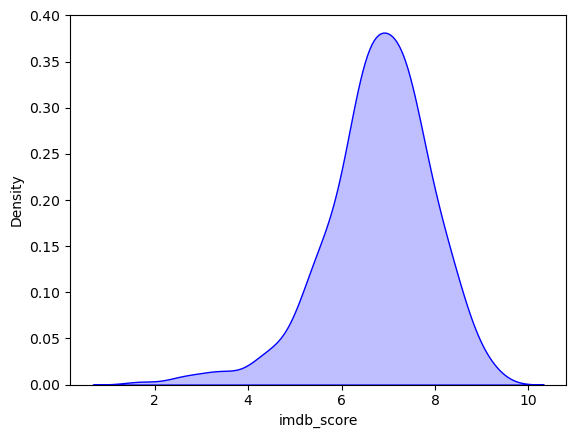

In [27]:
total_war_movies = titles_boolean_df.loc[titles_boolean_df['war_movies']==True] 

kde = sns.kdeplot(total_war_movies['imdb_score'], color = 'blue', shade = True)
plt.show()

Then I did the same thing but for gangster movies.

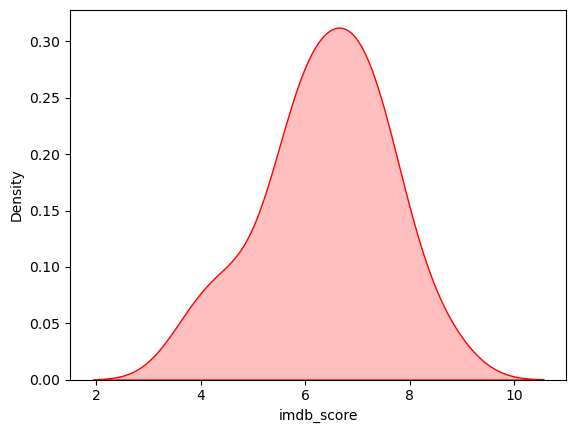

In [28]:
total_gangster_movies = titles_boolean_df.loc[titles_boolean_df['gangster_movies']==True]
kde = sns.kdeplot(total_gangster_movies['imdb_score'], color = 'red', shade = True) 
plt.show()